<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/pytorch_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

In [3]:
train_data = CIFAR10(
    root = './',
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = CIFAR10(
    root = './',
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 170498071/170498071 [00:03<00:00, 48315022.18it/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


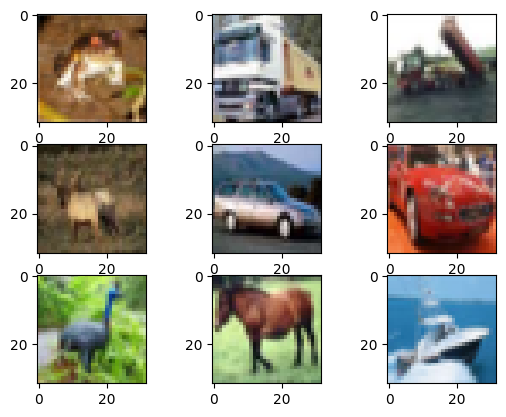

In [4]:
for temp in range(9):
    plt.subplot(3, 3, temp + 1)
    plt.imshow(train_data.data[temp])

plt.show()

데이터 증강 방법

1. 회전(Rotation)

2. 사이즈 변형

3. 좌, 우, 상, 하 반전

4. 이동

5. 일부분 활용(Crop)

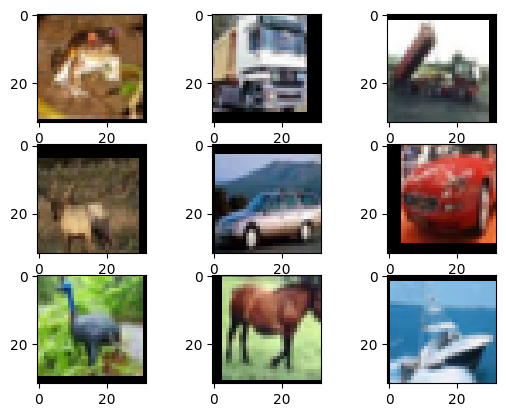

In [5]:
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop
import torchvision.transforms as T

test_transform = Compose(
    [
        T.ToPILImage(),
        T.RandomCrop((32, 32), padding = 4),
        T.RandomHorizontalFlip(p = 0.5) #y축을 기준으로 50퍼 확률로 회전
    ]
)

for temp in range(9):
    plt.subplot(3, 3, temp + 1)
    plt.imshow(test_transform(train_data.data[temp]))

plt.show()

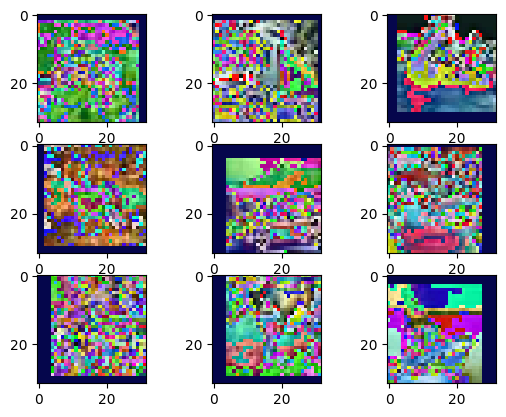

In [6]:
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop
import torchvision.transforms as T
from torchvision.transforms import Normalize

test_transform = Compose(
    [
        T.ToPILImage(),
        RandomCrop((32, 32), padding = 4),
        RandomHorizontalFlip(p = 0.5), #y축을 기준으로 50퍼 확률로 회전
        T.ToTensor(),
        Normalize(mean = ( 0.4914, 0.4822, 0.4465), std = (0.247, 0.243, 0.261)),
        T.ToPILImage()
    ]
)

for temp in range(9):
    plt.subplot(3, 3, temp + 1)
    plt.imshow(test_transform(train_data.data[temp]))

plt.show()

In [7]:
#  Normalize(mean = ( 0.4914, 0.4822, 0.4465), std = (0.247, 0.243, 0.261))
# Normalize에 사용되는 mean, std 계산하기
import torch
import numpy as np

imgs = []

for temp in train_data:
    imgs.append(temp[0])

#dim -> 차원
imgs = torch.stack(imgs, dim = 0).numpy()

mean_r = imgs[:, 0, :, :].mean() #r의 평균
mean_g = imgs[:, 1, :, :].mean() #g의 평균
mean_b = imgs[:, 2, :, :].mean() #b의 평균
print(mean_r, mean_g, mean_b)

0.49139968 0.48215827 0.44653124


In [8]:
std_r = imgs[:, 0, :, :].std() #r의 표준편차
std_g = imgs[:, 1, :, :].std() #g의 표준편차
std_b = imgs[:, 2, :, :].std() #b의 표준편차
print(std_r, std_g, std_b)

0.24703233 0.24348505 0.26158768
